In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential,Input
from keras.models import Model
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Reshape,concatenate,Dropout
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils.vis_utils import plot_model

In [9]:
def sepnum(number):
    number = [int(i) for i in str(number)]
    number = np.asarray(number)
    number = number.reshape(9,9)
    return number
def probsort(num):
    temp = np.zeros(shape=(9,9,9))
    for i in range(9):
        for j in range(9):
            a=int(num[i,j,0])-1
            temp[i,j,a]=1 

    return temp

x_train=np.zeros(shape=(10000,9,9,1))
x_test=np.zeros(shape=(10000,9,9,1))
y_train=np.zeros(shape=(10000,9,9,9))
y_test=np.zeros(shape=(10000,9,9,9))

data= pd.read_csv("D:\python\sudoku solver\sudoku.csv",nrows=20000)

In [10]:
for i in range(10000):
    x_train[i,:,:,0]= sepnum(data.iloc[i,0])
    x_test[i,:,:,0]= sepnum(data.iloc[(i+10000),0])
    y_train[i,:,:,0]= sepnum(data.iloc[i,1])
    y_test[i,:,:,0]= sepnum(data.iloc[(i+10000),1])
    i=i+1

for i in range(10000):
    for j in range(9):
        for k in range(9):
            x_train[i,j,k,0]=(x_train[i,j,k,0]-1)/8
            x_test[i,j,k,0]=(x_test[i,j,k,0]-1)/8

            x_train[i,j,k,0]=x_train[i,j,k,0]-0.5
            x_test[i,j,k,0]=x_test[i,j,k,0]-0.5



for i in range(10000):
    y_train[i]=probsort(y_train[i])
    y_test[i]=probsort(y_train[i])



print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(10000, 9, 9, 1) (10000, 9, 9, 1) (10000, 9, 9, 9) (10000, 9, 9, 9)


In [11]:
print(x_train[0,:,:,:])
print(y_train[0,:,:,:])

[[[-0.625]
  [ 0.25 ]
  [-0.625]
  [-0.625]
  [-0.625]
  [-0.625]
  [-0.625]
  [-0.125]
  [-0.25 ]]

 [[-0.625]
  [-0.125]
  [-0.625]
  [-0.625]
  [-0.625]
  [ 0.5  ]
  [ 0.125]
  [-0.5  ]
  [-0.625]]

 [[ 0.375]
  [-0.625]
  [-0.625]
  [ 0.125]
  [-0.25 ]
  [-0.125]
  [ 0.5  ]
  [-0.625]
  [-0.625]]

 [[-0.625]
  [ 0.5  ]
  [-0.125]
  [-0.625]
  [ 0.   ]
  [-0.375]
  [-0.625]
  [-0.625]
  [-0.625]]

 [[-0.25 ]
  [ 0.   ]
  [ 0.375]
  [-0.125]
  [ 0.125]
  [-0.625]
  [-0.625]
  [-0.375]
  [-0.625]]

 [[-0.625]
  [-0.625]
  [-0.625]
  [ 0.375]
  [-0.625]
  [-0.625]
  [ 0.   ]
  [-0.25 ]
  [-0.625]]

 [[-0.625]
  [ 0.375]
  [-0.625]
  [-0.625]
  [ 0.25 ]
  [-0.625]
  [-0.625]
  [ 0.5  ]
  [-0.5  ]]

 [[ 0.5  ]
  [-0.625]
  [-0.375]
  [-0.5  ]
  [-0.625]
  [-0.625]
  [-0.625]
  [-0.625]
  [ 0.   ]]

 [[-0.625]
  [-0.625]
  [ 0.25 ]
  [-0.625]
  [-0.125]
  [-0.625]
  [ 0.375]
  [-0.625]
  [-0.375]]]
[[[0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 9, 9, 1)]    0           []                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, 9, 9, 32)     320         ['input_3[0][0]']                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 9, 9, 32)     320         ['input_3[0][0]']                
                                                                                                  
 conv2d_42 (Conv2D)             (None, 9, 9, 32)     320         ['input_3[0][0]']                
                                                                                            

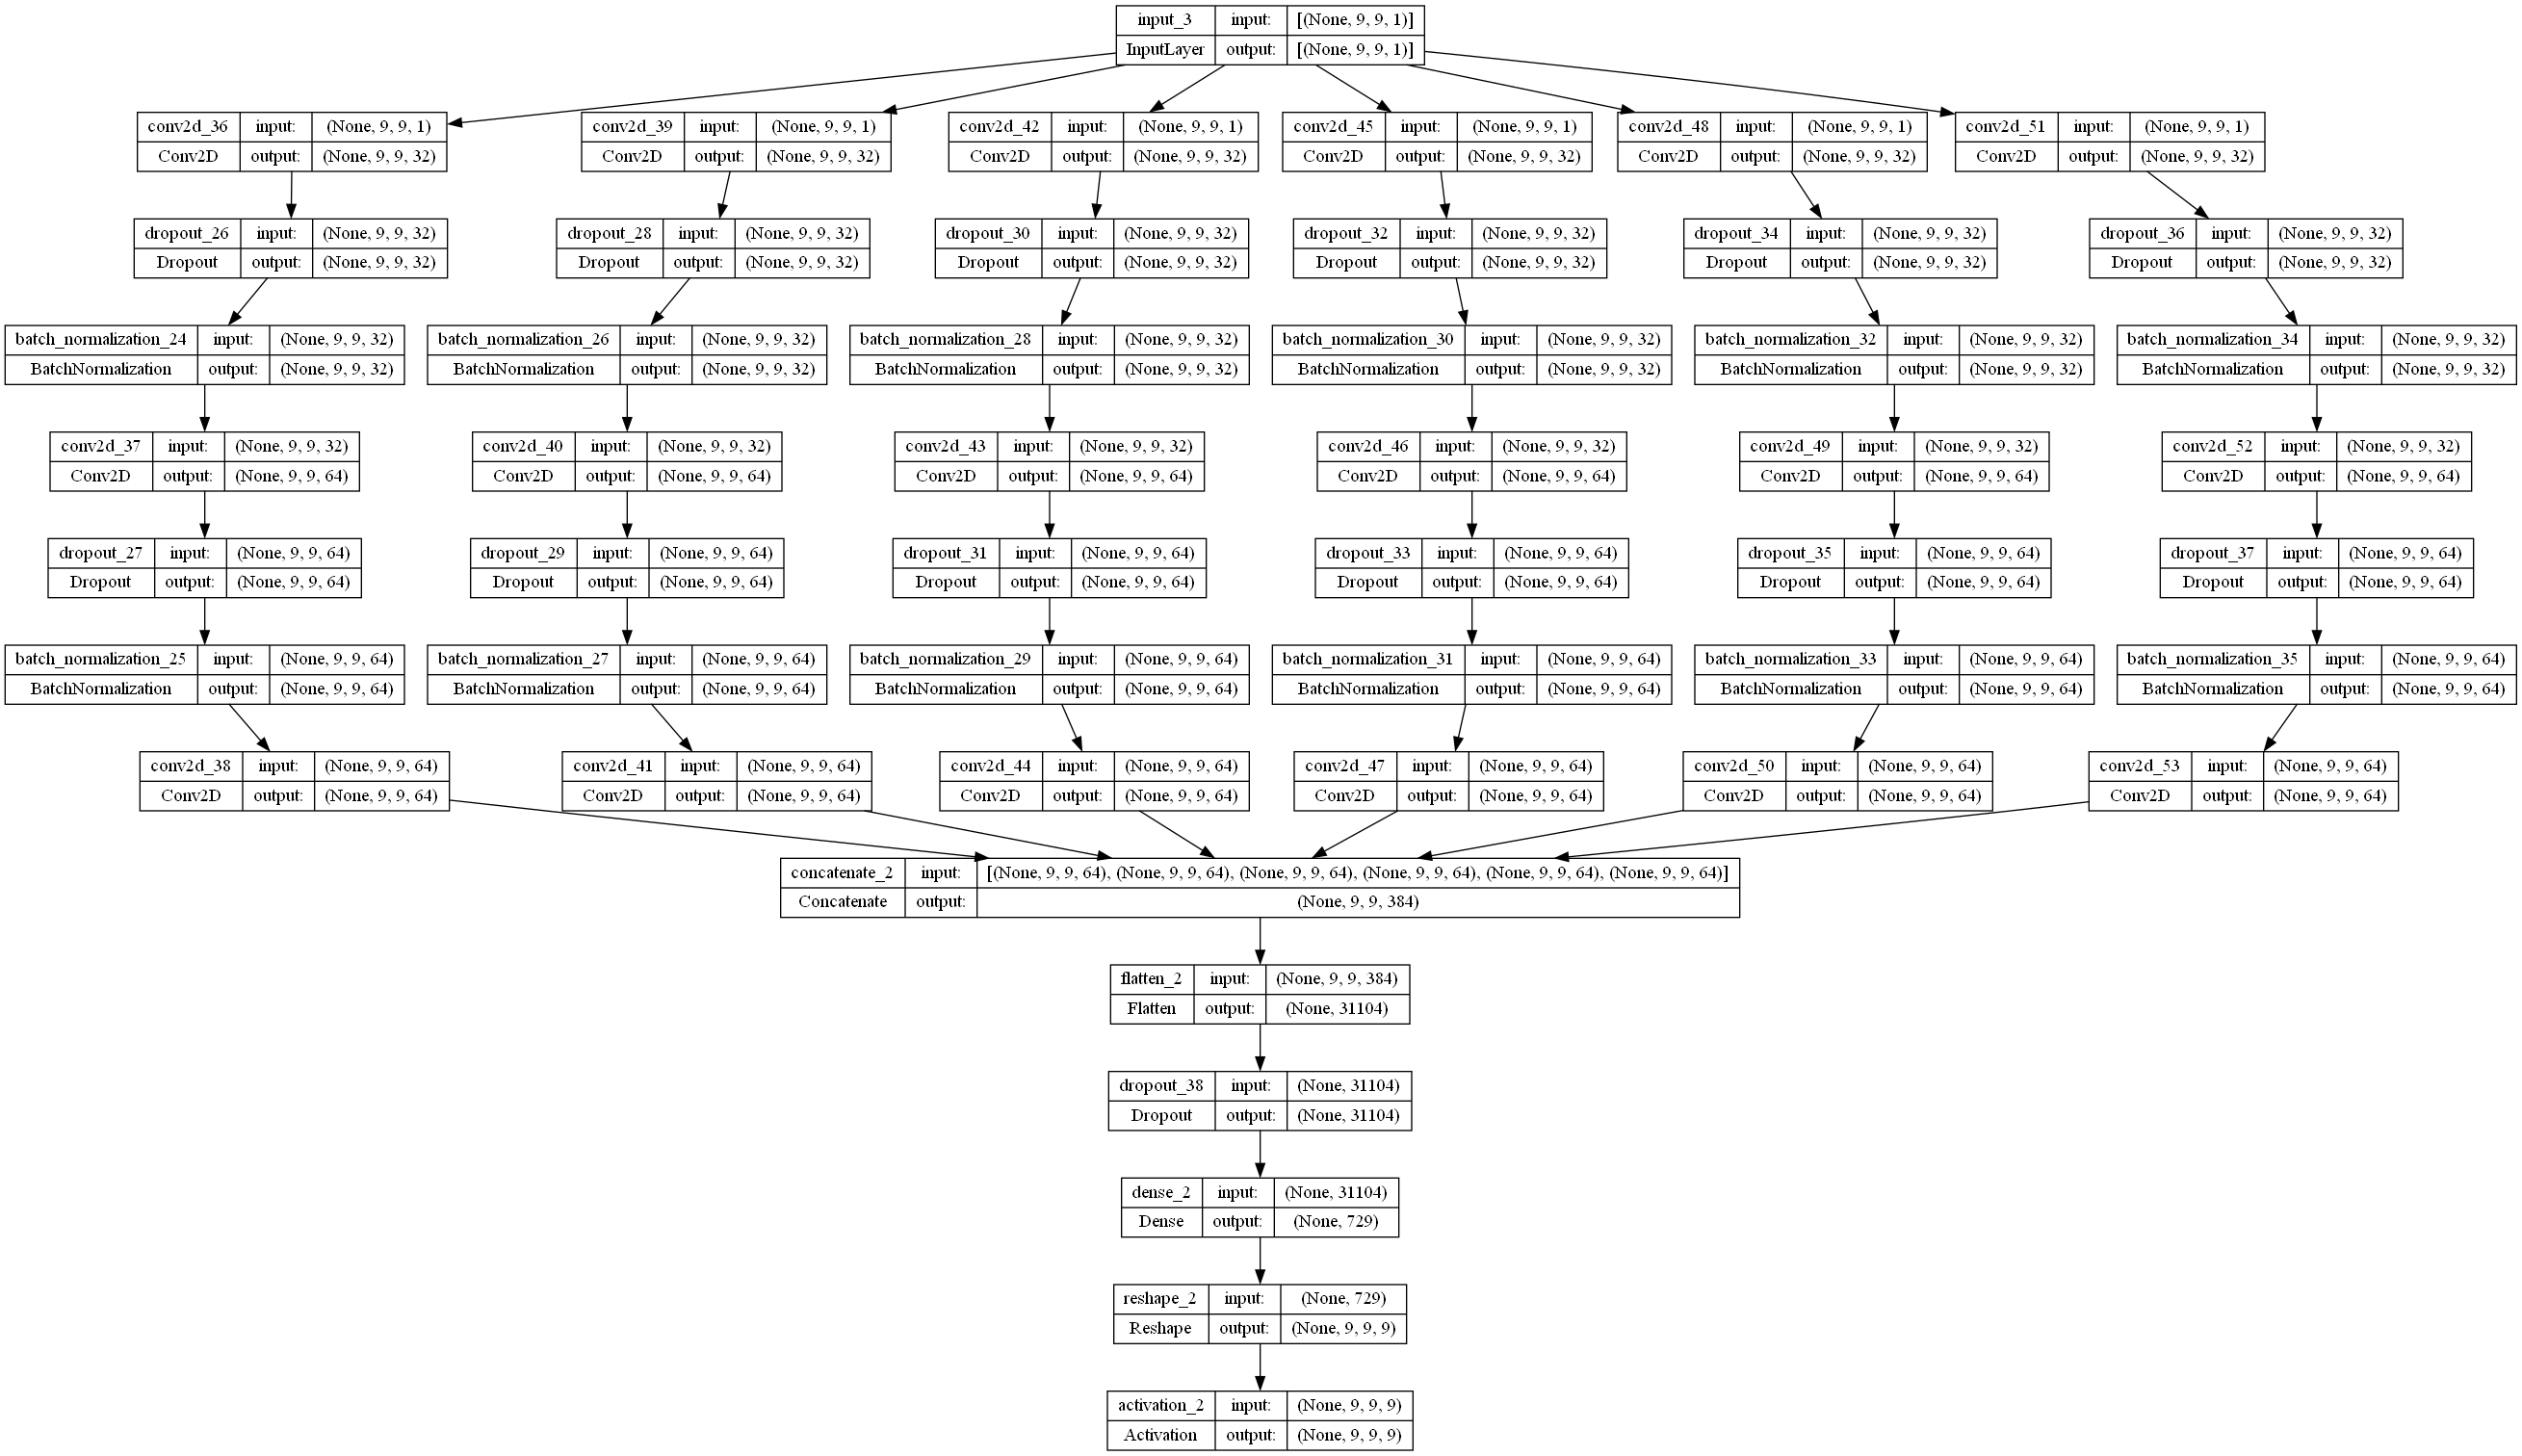

In [16]:
first_input = Input(shape=(9,9,1))
first_1_conv = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
first_1_dropout = Dropout(0.2)(first_1_conv)
first_1_norm = BatchNormalization()(first_1_dropout)
first_2_conv = Conv2D(64, (1, 9), padding='same', activation='relu')(first_1_norm)
first_2_dropout = Dropout(0.2)(first_2_conv)
first_2_norm = BatchNormalization()(first_2_dropout)
first_3_conv = Conv2D(64, (9, 1), padding='same', activation='relu')(first_2_norm)

second_1_conv = Conv2D(32, (1, 9), padding='same', activation='relu')(first_input)
second_1_dropout = Dropout(0.2)(second_1_conv)
second_1_norm = BatchNormalization()(second_1_dropout)
second_2_conv = Conv2D(64, (9, 1), padding='same', activation='relu')(second_1_norm)
second_2_dropout = Dropout(0.2)(second_2_conv)
second_2_norm = BatchNormalization()(second_2_dropout)
second_3_conv = Conv2D(64, (3, 3), padding='same', activation='relu')(second_2_norm)

third_1_conv = Conv2D(32, (9, 1), padding='same', activation='relu')(first_input)
third_1_dropout = Dropout(0.2)(third_1_conv)
third_1_norm = BatchNormalization()(third_1_dropout)
third_2_conv = Conv2D(64, (3, 3), padding='same', activation='relu')(third_1_norm)
third_2_dropout = Dropout(0.2)(third_2_conv)
third_2_norm = BatchNormalization()(third_2_dropout)
third_3_conv = Conv2D(64, (1, 9), padding='same', activation='relu')(third_2_norm)

fourth_1_conv = Conv2D(32, (3, 3), padding='same', activation='relu')(first_input)
fourth_1_dropout = Dropout(0.2)(fourth_1_conv)
fourth_1_norm = BatchNormalization()(fourth_1_dropout)
fourth_2_conv = Conv2D(64, (9, 1), padding='same', activation='relu')(fourth_1_norm)
fourth_2_dropout = Dropout(0.2)(fourth_2_conv)
fourth_2_norm = BatchNormalization()(fourth_2_dropout)
fourth_3_conv = Conv2D(64, (1, 9), padding='same', activation='relu')(fourth_2_norm)

fifth_1_conv = Conv2D(32, (1, 9), padding='same', activation='relu')(first_input)
fifth_1_dropout = Dropout(0.2)(fifth_1_conv)
fifth_1_norm = BatchNormalization()(fifth_1_dropout)
fifth_2_conv = Conv2D(64, (3, 3), padding='same', activation='relu')(fifth_1_norm)
fifth_2_dropout = Dropout(0.2)(fifth_2_conv)
fifth_2_norm = BatchNormalization()(fifth_2_dropout)
fifth_3_conv = Conv2D(64, (9, 1), padding='same', activation='relu')(fifth_2_norm)

sixth_1_conv = Conv2D(32, (9, 1), padding='same', activation='relu')(first_input)
sixth_1_dropout = Dropout(0.2)(sixth_1_conv)
sixth_1_norm = BatchNormalization()(sixth_1_dropout)
sixth_2_conv = Conv2D(64, (1, 9), padding='same', activation='relu')(sixth_1_norm)
sixth_2_dropout = Dropout(0.2)(sixth_2_conv)
sixth_2_norm = BatchNormalization()(sixth_2_dropout)
sixth_3_conv = Conv2D(64, (3, 3), padding='same', activation='relu')(sixth_2_norm)

merge = concatenate([first_3_conv, second_3_conv, third_3_conv, fourth_3_conv, fifth_3_conv, sixth_3_conv])
flatten = Flatten()(merge)
dropout = Dropout(0.2)(flatten)
first_dense = Dense(81*9)(dropout)
reshape = Reshape((9,9,9))(first_dense)
activation = Activation('softmax')(reshape)

model = Model(inputs=[first_input], outputs=activation)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [13]:
history=model.fit(x_train,y_train,epochs=25,batch_size = 100,validation_split=0.33,verbose=1)

Epoch 1/25
67/67 [==============================] - 55s 758ms/step - loss: 3.8362 - accuracy: 0.1211 - val_loss: 2.1961 - val_accuracy: 0.1196
Epoch 2/25
67/67 [==============================] - 51s 755ms/step - loss: 2.1331 - accuracy: 0.1825 - val_loss: 2.1885 - val_accuracy: 0.1378
Epoch 3/25
67/67 [==============================] - 50s 746ms/step - loss: 2.0117 - accuracy: 0.2375 - val_loss: 2.2055 - val_accuracy: 0.1368
Epoch 4/25
67/67 [==============================] - 51s 756ms/step - loss: 1.8613 - accuracy: 0.3042 - val_loss: 2.2527 - val_accuracy: 0.1467
Epoch 5/25
67/67 [==============================] - 51s 756ms/step - loss: 1.6801 - accuracy: 0.3841 - val_loss: 2.2681 - val_accuracy: 0.1576
Epoch 6/25
67/67 [==============================] - 50s 753ms/step - loss: 1.4733 - accuracy: 0.4693 - val_loss: 2.2113 - val_accuracy: 0.1788
Epoch 7/25
67/67 [==============================] - 51s 757ms/step - loss: 1.2508 - accuracy: 0.5573 - val_loss: 2.1446 - val_accuracy: 0.2118

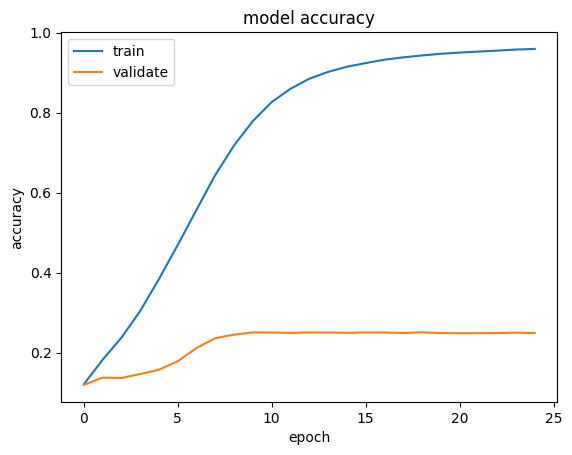

24.910147488117218


In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
a=history.history['val_accuracy']
print(a[-1]*100)